In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [2]:

# Open the binary file
with open('../GW.dat', 'rb') as f:
    # Read the dimensions (ncol, nlev) - Fortran writes integers in 4 bytes by default
    ncol, nlev = np.fromfile(f, dtype=np.int32, count=2)
    print(f"Dimensions read from file: ncol={ncol}, nlev={nlev}")

    # Read array (two dimensions), Fortran order
    zm = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    # Read  array (two dimensions), Fortran order
    zi = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    
    tau_a = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_b = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

    bwv = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    tlb = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    wbr = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    ubmsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    nsrc = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')

    tauoro = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    taudsw = np.fromfile(f, dtype=np.float64, count=ncol  )                                               #.reshape((ncol, nlev+1), order='F')
    
    ubm = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
    tau = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    tau_diag = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

# 


Dimensions read from file: ncol=48600, nlev=93


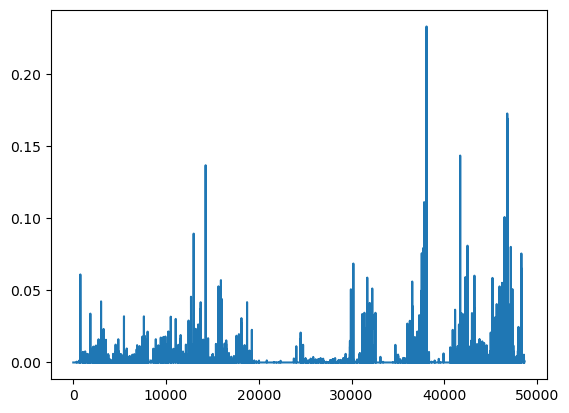

In [3]:
plt.plot( taudsw )

In [4]:
hfile =   '/glade/derecho/scratch/juliob/archive/ndg_Rdg04_c6455g3/atm/hist/ndg_Rdg04_c6455g3.cam.h2i.2014-01-15-00000.nc'
X=xr.open_dataset( hfile )

In [34]:
X

<xarray.Dataset>
Dimensions:       (ncol: 48600, lev: 93, ilev: 94, trop_pref: 84,
                   trop_prefi: 85, trop_cld_lev: 84, time: 1)
Coordinates:
  * lev           (lev) float64 0.008135 0.01834 0.03482 ... 983.2 991.2 997.5
  * ilev          (ilev) float64 0.004259 0.01201 0.02467 ... 987.4 995.1 1e+03
  * trop_pref     (trop_pref) float64 1.196 1.891 2.804 ... 983.2 991.2 997.5
  * trop_prefi    (trop_prefi) float64 0.9031 1.489 2.293 ... 987.4 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 1.196 1.891 2.804 ... 983.2 991.2 997.5
  * time          (time) object 2014-01-15 00:00:00
Dimensions without coordinates: ncol
Data variables: (12/60)
    lat           (ncol) float64 -35.03 -35.48 -35.92 ... 36.66 36.2 35.74
    lon           (ncol) float64 315.5 316.5 317.5 315.5 ... 137.0 136.0 135.0
    areawt        (ncol) float64 ...
    area          (ncol) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    ...            ...
    RHOIEGW       (time, ilev, ncol) float32 ...
    TAUM1_DIAG    (time, ilev, ncol) float32 0.0 0.0 0.0 ... 0.2153 0.002847
    ZIEGW         (time, ilev, ncol) float32 ...
    TAUM1_DIAG_A  (time, ilev, ncol) float32 0.0 0.0 0.0 ... 0.2153 0.002847
    TAUM1_DIAG_B  (time, ilev, ncol) float32 0.0 0.0 0.0 ... 0.2153 0.002847
    TAU1RDGBETAM  (time, ilev, ncol) float32 0.0 0.0 0.0 ... 0.02452 0.0001294
Attributes:
    ne:                30
    fv_nphys:          3
    Conventions:       CF-1.0
    source:            CAM
    case:              ndg_Rdg04_c6455g3
    logname:           juliob
    host:              dec2069
    initial_file:      /glade/campaign/cgd/amp/juliob/ERA5/ne30np4/L93/ERA5_x...
    topography_file:   /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bed...
    model_doi_url:     not_set
    time_period_freq:  hour_6

In [40]:
lon = X.lon.values
lat = X.lat.values

taudsw_cam = X.TAUDSW1.values
tauoro_cam = X.TAUORO1.values
tau_a_cam = X.TAUM1_DIAG_A.values
tau_b_cam = X.TAUM1_DIAG_B.values
tau_diag_cam = X.TAUM1_DIAG.values
tau_cam=X.TAU1RDGBETAM.values
ubm_cam=X.UBM1BETA.values
zm_cam=X.ZMEGW.values
zi_cam=X.ZIEGW.values
mxdis=X.MXDIS1.values


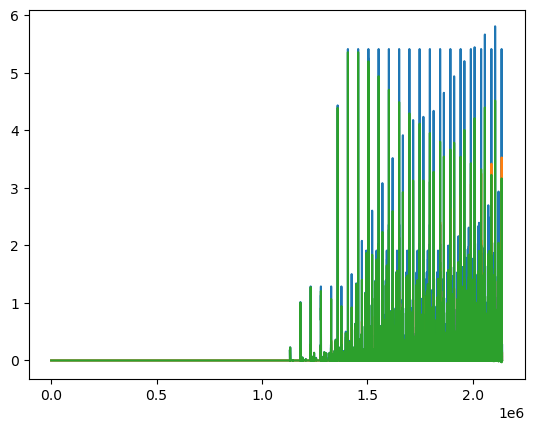

In [6]:
z=np.arange(start=50,stop=94)
plt.plot( tau_a_cam[0,z,:].flatten() )
plt.plot( tau_a.T[z,:].flatten() )
plt.plot( tau_a_cam[0,z,:].flatten() -  tau_a.T[z,:].flatten() )


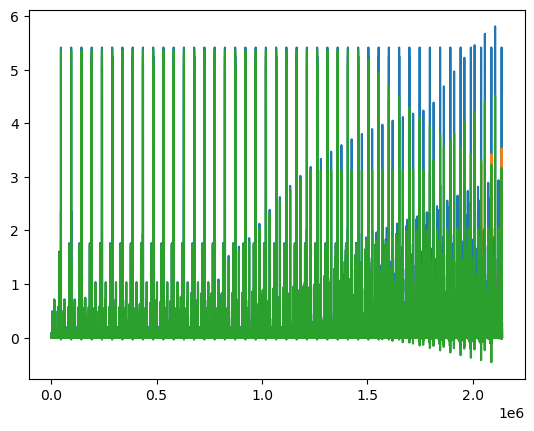

In [7]:
z=np.arange(start=50,stop=94)
plt.plot( tau_diag_cam[0,z,:].flatten() )
plt.plot( tau_diag.T[z,:].flatten() )
plt.plot( tau_diag_cam[0,z,:].flatten() -  tau_diag.T[z,:].flatten() )


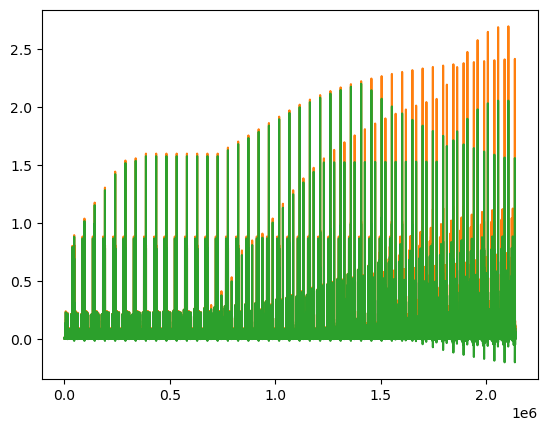

In [8]:
z=np.arange(start=50,stop=94)
plt.plot( tau.T[z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() )
plt.plot( tau_cam[0,z,:].flatten() -  tau.T[z,:].flatten() )


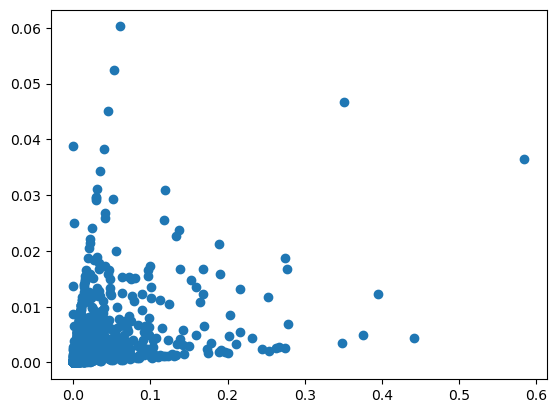

In [43]:
z=20 #np.arange(start=50,stop=94)
plt.scatter( tau_diag_cam[0,z,:].flatten() ,  tau_diag.T[z,:].flatten() )


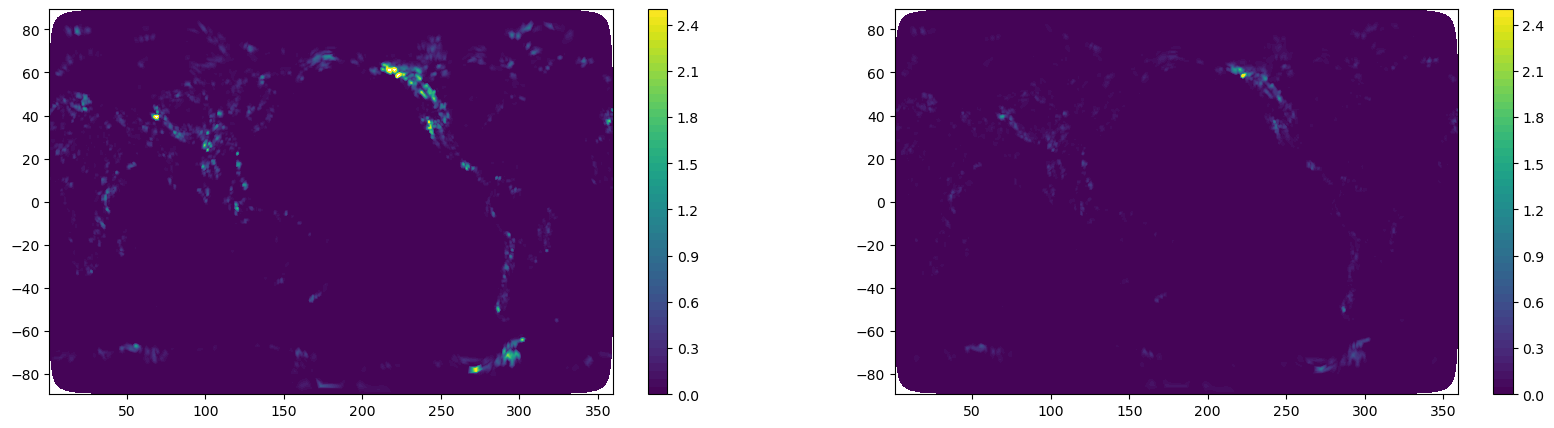

In [17]:
z=93
lev=1*np.linspace(0.,2.5,num=51)
fig,ax=plt.subplots(1,2,figsize=(20,5))
co=ax[0].tricontourf( lon,lat, tau_diag_cam[0,z,:], levels=lev )
plt.colorbar(co)
co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
plt.colorbar(co)


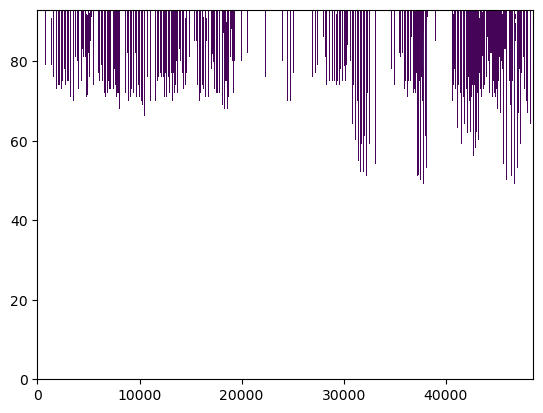

In [11]:
plt.contourf( tau_b.T[:,:]-tau_a.T[:,:] ,levels=lev )

3.5297569818771732


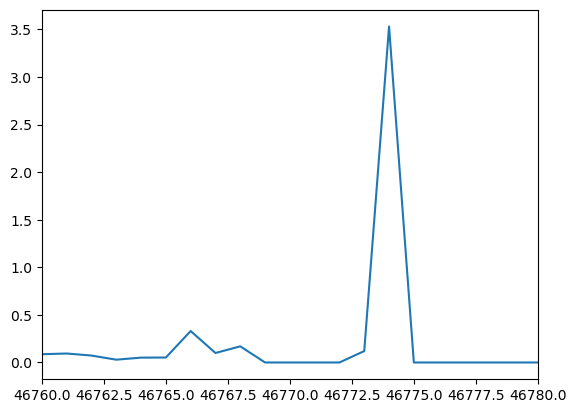

In [23]:
z=93
plt.plot( tau_a[:,z]  )# -tau_a[:,z] )
plt.xlim((46760,46780))
i=46_774
print( tau_a[i,z] )

1536.428


(0.0, 10000.0)

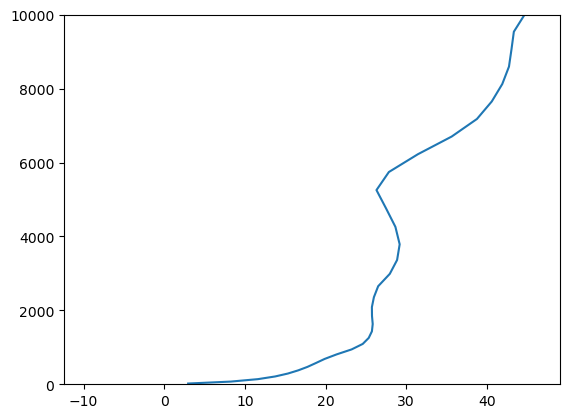

In [38]:
#plt.plot( tau_diag[i,:] )
plt.plot( ubm_cam[0,:,i] , zm_cam[0,:,i] )
print(mxdis[0,i] )
plt.ylim(0,10000)

(0.0, 10000.0)

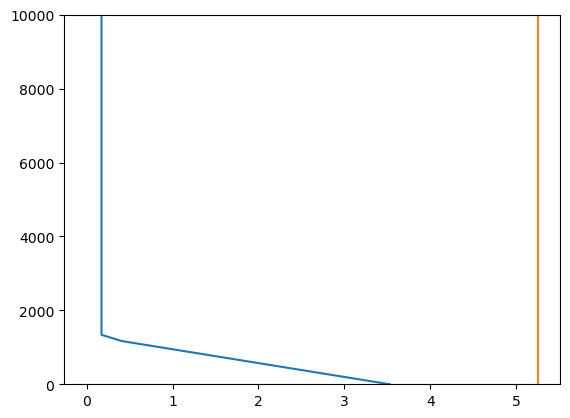

In [42]:
plt.plot( tau_diag[i,:] ,zi_cam[0,:,i])
plt.plot( tau_diag_cam[0,:,i], zi_cam[0,:,i] )
plt.ylim(0,10000)